In [53]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit import Parameter
from qiskit.circuit.library import RXGate
from qiskit.circuit.classical import expr
!pip3 list|grep qiskit

PennyLane-qiskit                  0.38.0
qiskit                            1.2.2
qiskit-aer                        0.15.1
qiskit-algorithms                 0.3.0
qiskit-ibm-experiment             0.4.8
qiskit-ibm-runtime                0.29.0
qiskit-ionq                       0.5.6
qiskit-machine-learning           0.7.2


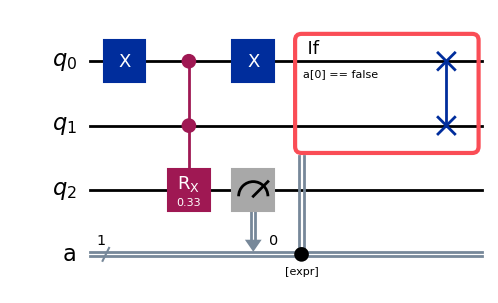

In [54]:
def jumpOper():
    qr = QuantumRegister(3,'q')
    cr = ClassicalRegister(1,'a')
    qc = QuantumCircuit(qr,cr)

    qc.x(0)
    gate=RXGate(0.33).control(2)
    qc.append(gate,[0,1,2])
    qc.x(0)
    
    #
    qc.measure(2, cr)

    # ... conditional gate
    with qc.if_test(expr.equal(cr[0],bool(0))): qc.swap(0,1)
    return qc

jumpOper().draw('mpl', idle_wires=False)

In [55]:
qr = QuantumRegister(6,'q')
cr = ClassicalRegister(4,'c')
qc = QuantumCircuit(qr,cr)

# ... initial state
qc.h(0)
qc.x(3)
qc.barrier()
print(qc)

     ┌───┐ ░ 
q_0: ┤ H ├─░─
     └───┘ ░ 
q_1: ──────░─
           ░ 
q_2: ──────░─
     ┌───┐ ░ 
q_3: ┤ X ├─░─
     └───┘ ░ 
q_4: ──────░─
           ░ 
q_5: ──────░─
           ░ 
c: 4/════════
             


In [56]:
qc.compose(jumpOper(), qubits=[qr[0],qr[1],qr[2]], clbits=[cr[0]], inplace=True)
qc.compose(jumpOper(), qubits=[qr[3],qr[4],qr[5]], clbits=[cr[1]], inplace=True)
qc.barrier()
qc.measure(0,2)

CircuitError: "Could not locate provided bit: Clbit(ClassicalRegister(1, 'a'), 0). Has it been added to the QuantumCircuit?"

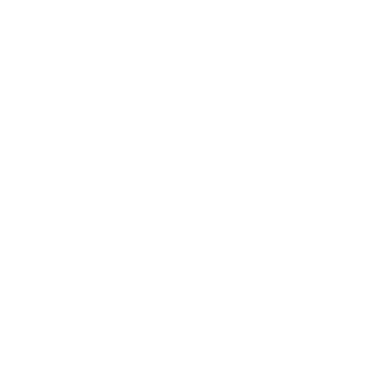

In [57]:
qc.draw('mpl', idle_wires=False)

In [58]:
print(qc)

CircuitError: "Could not locate provided bit: Clbit(ClassicalRegister(1, 'a'), 0). Has it been added to the QuantumCircuit?"